In [21]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mengimport semua libraray yang akan di pakai pada proses analisis

## **Data Loading**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\wahid\.cache\kagglehub\datasets\mujtabamatin\air-quality-and-pollution-assessment\versions\2


In [4]:
# membaca dataset
air_df = pd.read_csv(path + "/updated_pollution_dataset.csv")
air_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


**Key Features:**

  * Temperature (°C): Average temperature of the region.
  * Humidity (%): Relative humidity recorded in the region.
  * PM2.5 Concentration (µg/m³): Fine particulate matter levels.
  * PM10 Concentration (µg/m³): Coarse particulate matter levels.
  * NO2 Concentration (ppb): Nitrogen dioxide levels.
  * SO2 Concentration (ppb): Sulfur dioxide levels.
  * CO Concentration (ppm): Carbon monoxide levels.
  * Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
  * Population Density (people/km²): Number of people per square kilometer in the region.

**Target Variable: Air Quality Levels**

  * Good: Clean air with low pollution levels.
  * Moderate: Acceptable air quality but with some pollutants present.
  * Poor: Noticeable pollution that may cause health issues for sensitive groups.
  * Hazardous: Highly polluted air posing serious health risks to the population.

**Keterangan**:
  * Temperature (°C): Suhu rata-rata wilayah tersebut.
  * Humidity (%): Kelembaban relatif yang tercatat di wilayah tersebut.
  * PM10 Concentration (µg/m³): Tingkat materi partikulat kasar.
  * NO2 Concentration (ppb): Tingkat nitrogen dioksida.
  * SO2 Concentration (ppb): Tingkat sulfur dioksida.
  * CO Concentration (ppm): Tingkat karbon monoksida.
  * Population Density (people/km²): Jumlah orang per kilometer persegi di wilayah tersebut.

### **Encode Target**

In [5]:
label_encoder = LabelEncoder()
air_df['Air Quality'] = label_encoder.fit_transform(air_df['Air Quality'])

air_df.head()
print(air_df['Air Quality'].unique())
print(label_encoder.classes_)

[2 0 1 3]
['Good' 'Hazardous' 'Moderate' 'Poor']


merubah data pada kolom Air Quality dari kategorikal menjadi data numeric dengan menggunakan label encoder

In [6]:
# Invers transform untuk mengetahui mapping asli
mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(mapping)

{0: 'Good', 1: 'Hazardous', 2: 'Moderate', 3: 'Poor'}


melihat mapping dari data kategorikal yang sudah mejadi bentuk numeric.

## **EDA**

In [7]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


menampilkan informasi terkait data pada setiap kolom mulai dari nama kolom hingga tipe data yang dipakai pada kolom tersebut.

In [8]:
air_df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.187553
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.500000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,2.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [9]:
print(f"Jumlah data: {air_df.shape[0]}")
print(f"Jumlah data kosong : {air_df.isna().sum().to_dict()}")
print(f"Jumlah data duplicated : {air_df.duplicated().sum()}")

Jumlah data: 5000
Jumlah data kosong : {'Temperature': 0, 'Humidity': 0, 'PM2.5': 0, 'PM10': 0, 'NO2': 0, 'SO2': 0, 'CO': 0, 'Proximity_to_Industrial_Areas': 0, 'Population_Density': 0, 'Air Quality': 0}
Jumlah data duplicated : 0


### **Handling Outliers**

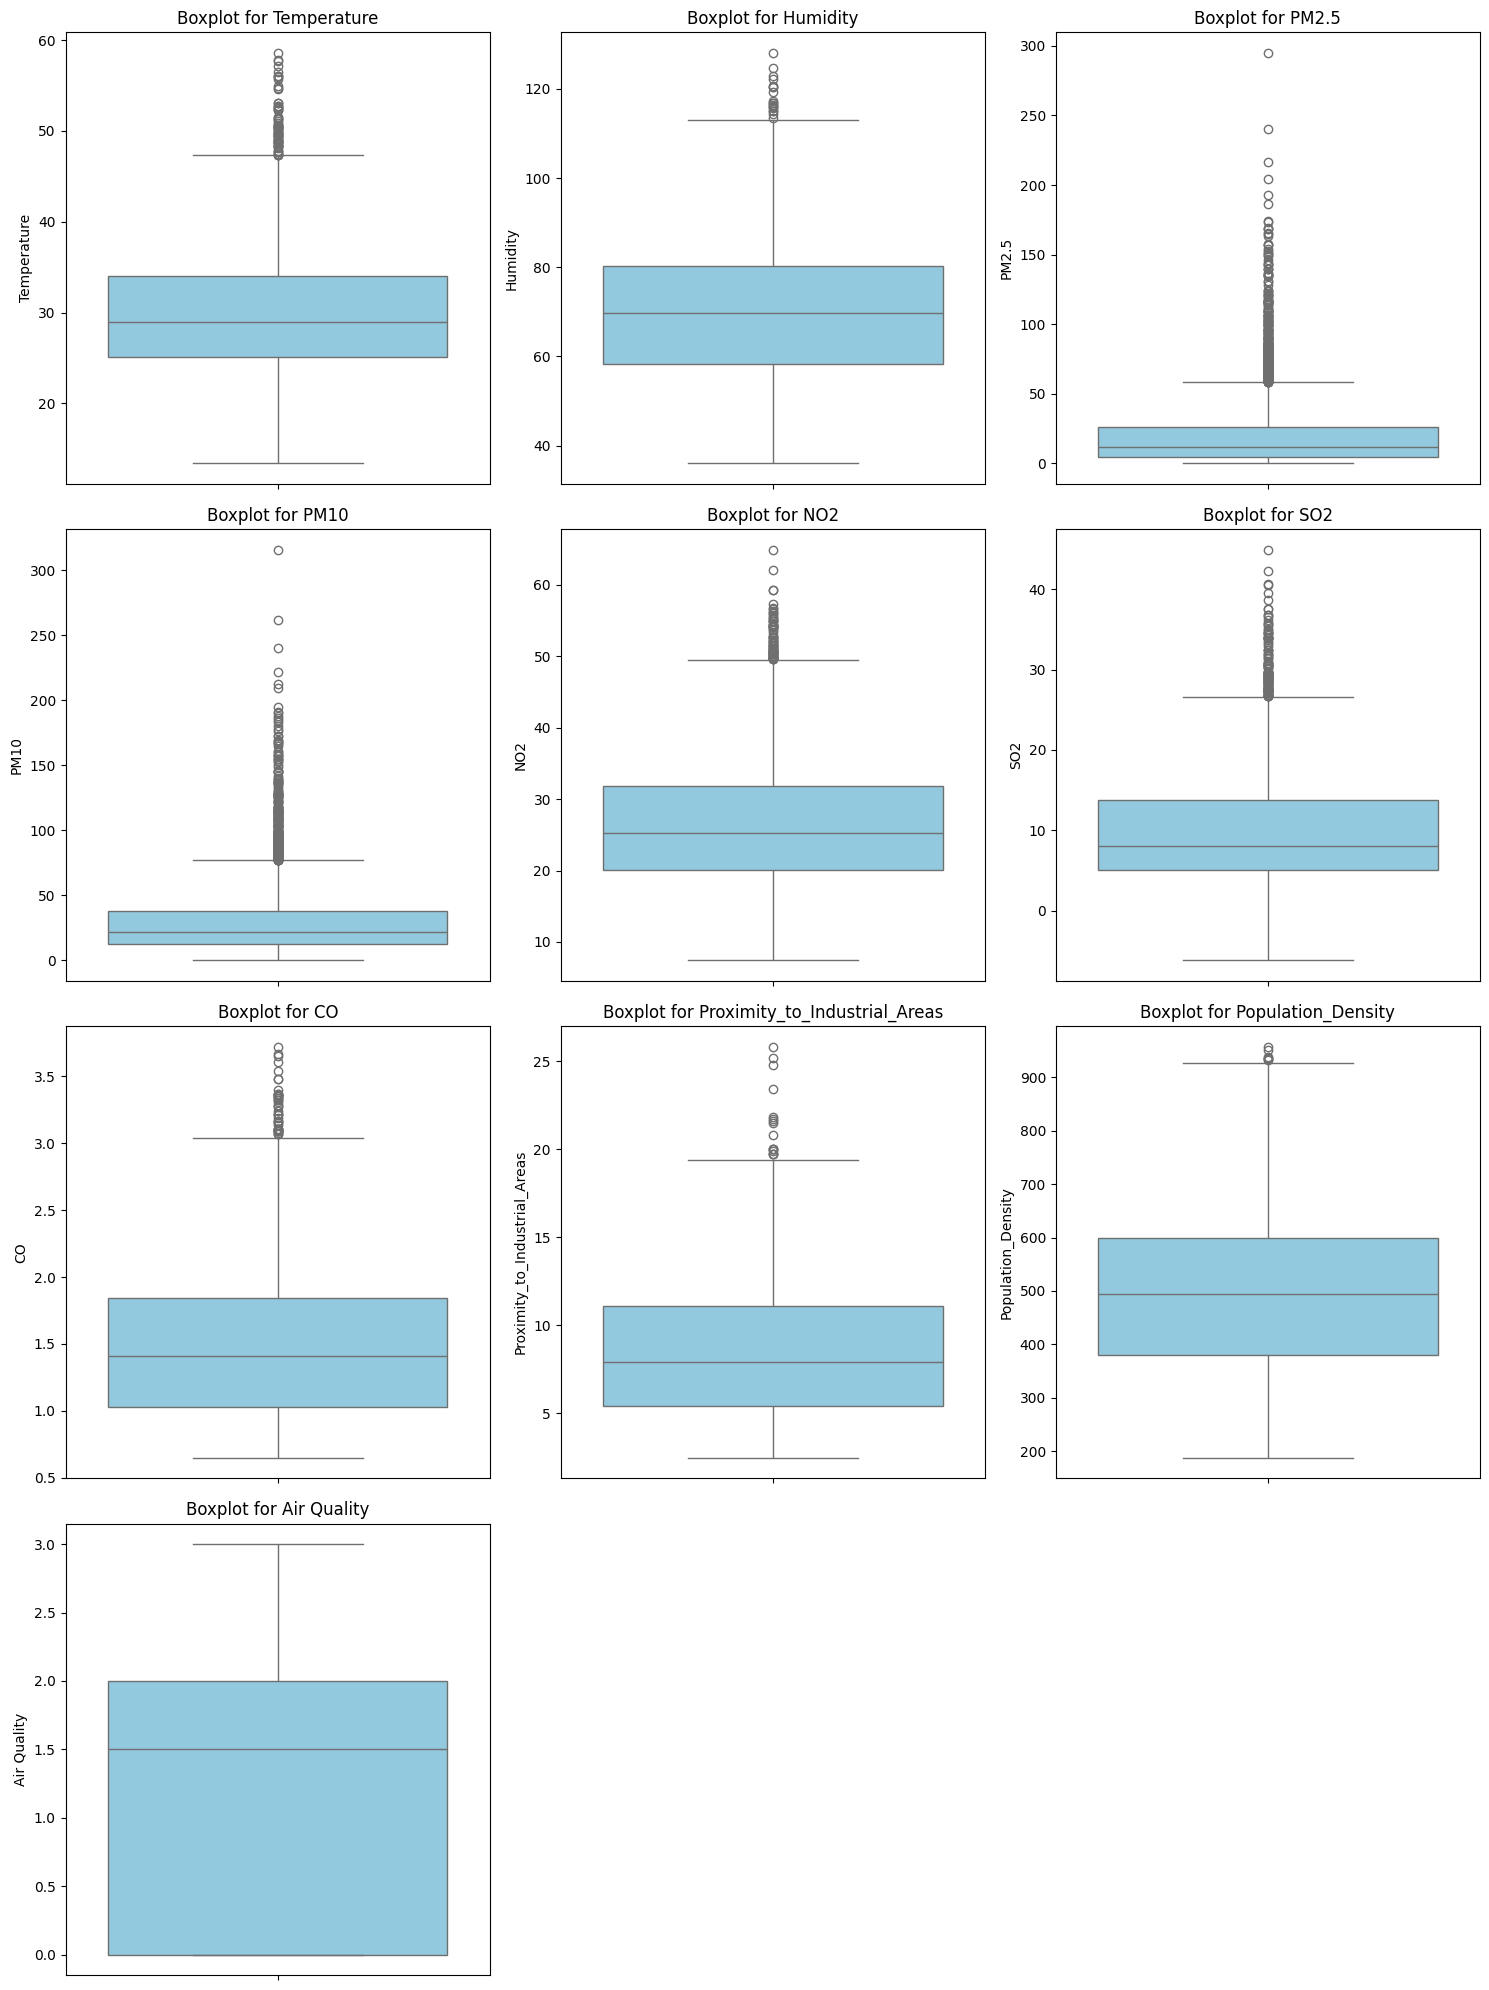

In [10]:
import math

numerical_features = air_df.select_dtypes(include=['int64', 'float64']).columns.to_list()

# Tentukan jumlah kolom dan baris
n_cols = 3  # Jumlah kolom dalam grid
n_rows = math.ceil(len(numerical_features) / n_cols)  # Hitung jumlah baris berdasarkan jumlah fitur

# Buat grid plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes agar iterasi lebih mudah
axes = axes.flatten()

# Iterasi setiap fitur numerik dan buat boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=air_df[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot for {feature}")

# Hapus subplot kosong jika jumlah fitur tidak genap
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

melihat data yang memiliki outlier dengan menggunakan visualisasi boxplot dengan menggunakan seaborn 

In [11]:
numeric_columns = air_df.select_dtypes(include=['number'])

# Hitung Q1, Q3, dan IQR
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Drop outliers
air_df = air_df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
air_df.shape

(4407, 10)

menangani outlier yang ada pada data dengan cara membuang data yang memilki outlier

### **Univariate Analysis**

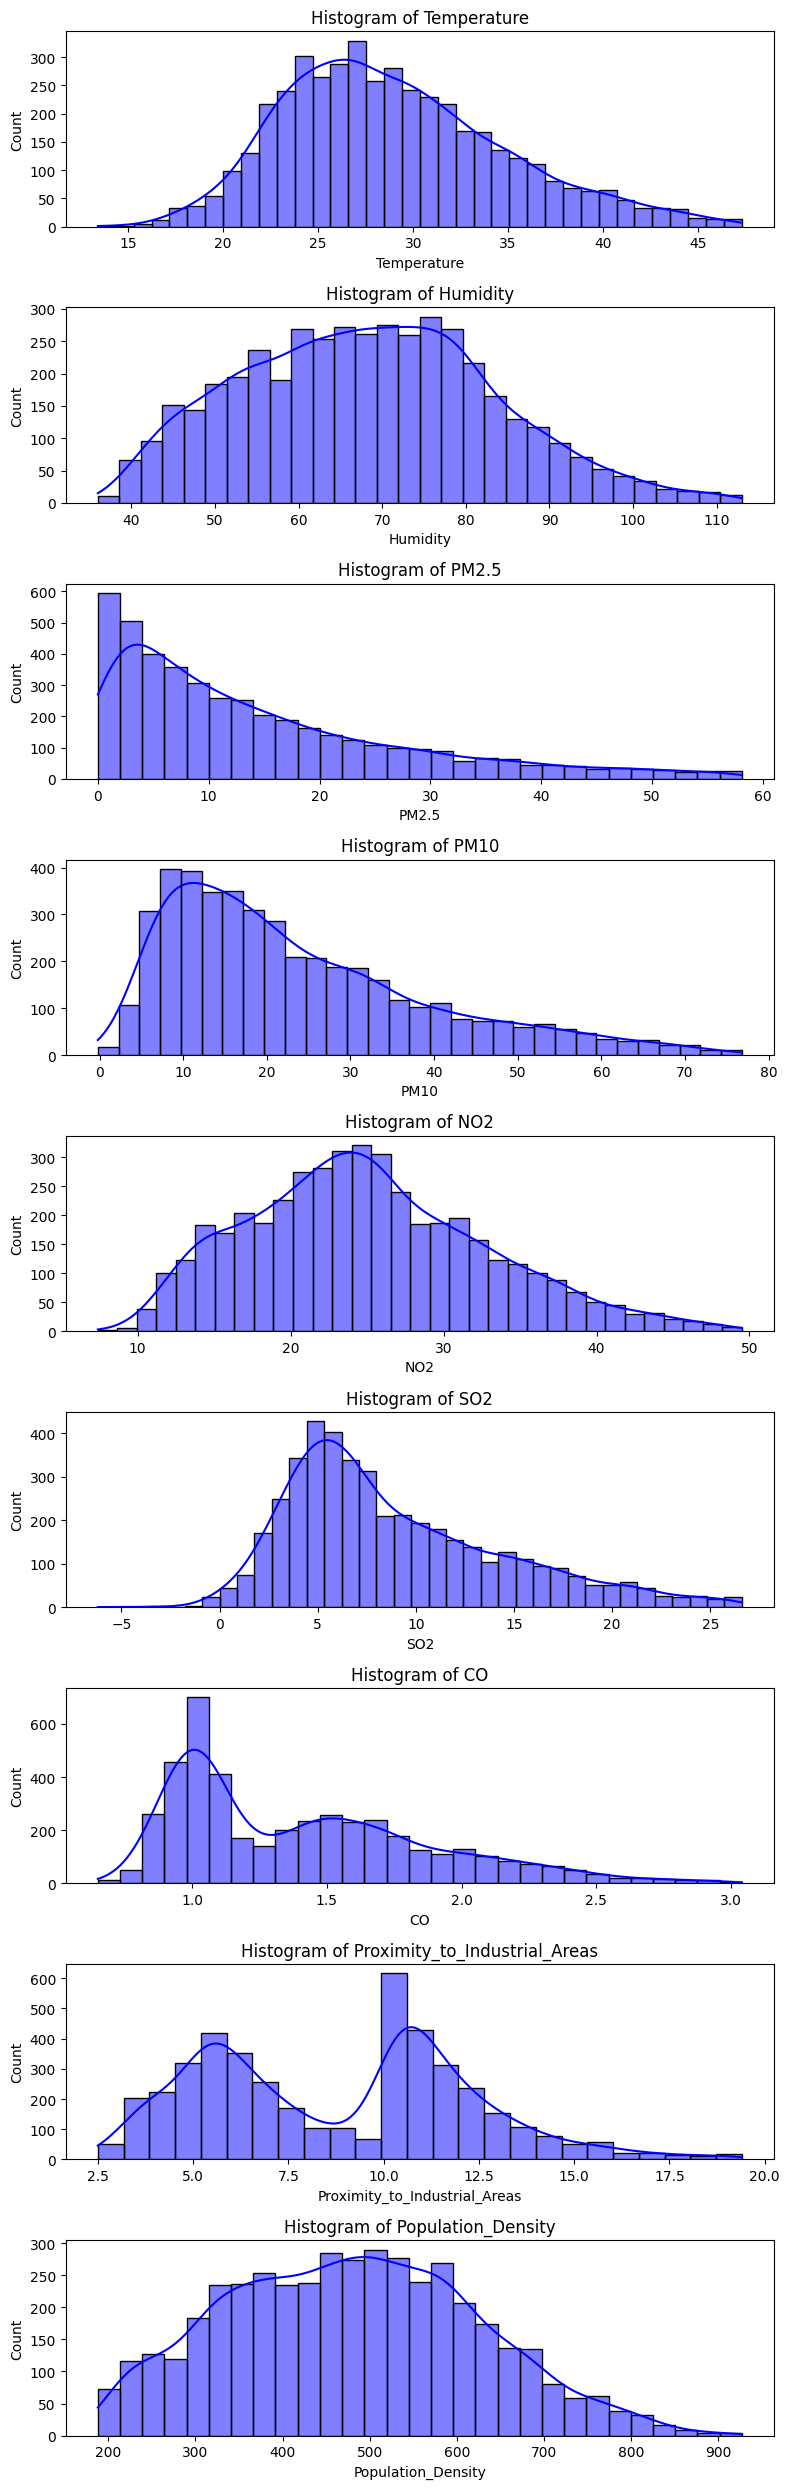

In [12]:
features = numerical_features[:-1]

plt.figure(figsize=(8, 25))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.histplot(air_df[feature], kde=True, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.tight_layout()
plt.show()

menampilkan visualisasi data dari hasil univariate analisis, maksudnya menampilkan keterkaitan antara data secara individual. dan untuk dataset yang saya pakai karena semua kolom bertipe numeric maka yang bisa saya visualkan adalah dengan menggunakan data numeric

### **Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

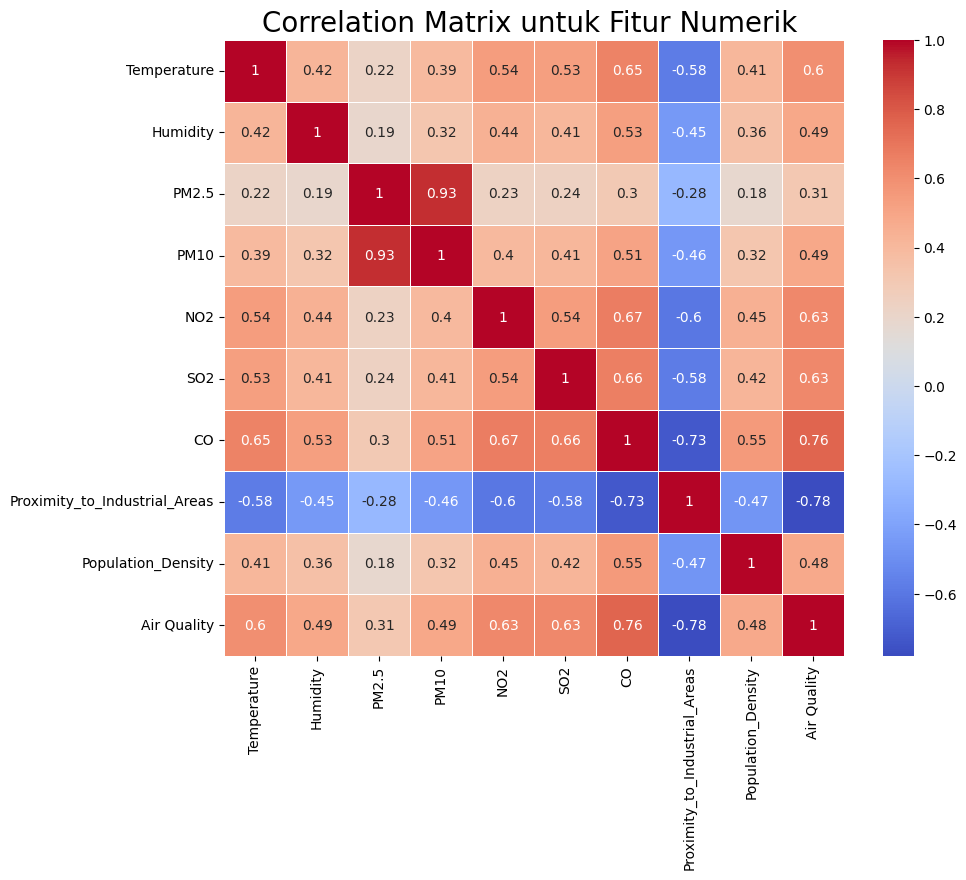

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = air_df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

berikut adalah visualisasi dari multivariate analisis yang dimana, membuat visualisasi menganai keterkaitan antara feature pada sebuah target. Pada visualisasi tersebut feature yang memiliki pengaruh besar terhadap target adalah feature SO2 dan NO2

## **Data Preparation**

In [14]:
# Membuang 2 feature yang memilki korelasi terendah dengan Target
air_df.drop(columns=['Proximity_to_Industrial_Areas', 'PM2.5'], inplace=True, axis=1)
air_df.head()

,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density,Air Quality
0,29.8,59.1,17.9,18.9,9.2,1.72,319,2
1,28.3,75.6,12.2,30.8,9.7,1.64,611,2
2,23.1,74.7,33.8,24.4,12.6,1.63,619,2
3,27.1,39.1,6.3,13.5,5.3,1.15,551,0
4,26.5,70.7,16.0,21.9,5.6,1.01,303,0


karena feature roximity_to_Industrial_Areas, PM2.5 memilki angka korelasi yang sangat rendah untuk mempermudah analisis selanjutnya kedua feature tersebut saya hapus

### **Train-Test-Split**

In [15]:
X = air_df.drop(columns=['Air Quality'])
y = air_df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

print(f"Data train: {X_train.shape[0]}")
print(f"Data test: {X_test.shape[0]}")

Data train: 3525
Data test: 882


membagi dataset kedalam data train dan data test dengan preposisi data test sebesar 20 persen menggunakan train_test_split yang di sediakan pada library sklearn.

### **Standarisasi**

In [16]:
numerical_features = air_df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_features.remove('Air Quality')
numerical_features

['Temperature', 'Humidity', 'PM10', 'NO2', 'SO2', 'CO', 'Population_Density']

memisahkan kolom target dan feature untuk dilakukan proses standarisasi 

In [17]:
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

air_df[numerical_features] = scaller.fit_transform(air_df[numerical_features])
air_df.head()

,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density,Air Quality
0,0.135087,-0.612980,-0.367968,-0.784867,0.043282,0.668680,-1.107523,2
1,-0.120215,0.485700,-0.731597,0.738532,0.132790,0.498172,0.912867,2
2,-1.005261,0.425772,0.646367,-0.080775,0.651936,0.476858,0.968220,2
3,-0.324456,-1.944713,-1.107985,-1.476157,-0.654881,-0.546191,0.497718,0
4,-0.426577,0.159426,-0.489178,-0.400817,-0.601176,-0.844580,-1.218230,0


menstandarisasi semua kolom feature yang berguna untuk mengurangi data yang memiliki nilai imbalenced dengan menggunakan standardscaller

## **Model**

In [18]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

membuat model untuk klasifikasi dengan menggunakan randomForestClassifier dengan n_estimators(jumlah pohon) sebanyak 100 dan default random_state yaitu 42

In [19]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

membuat model klasifikasi kedua dengan menggunakan KNN dengan parameter n_neighbors sebanyak 5

membuat model klasifikasi ketiga dengan menggunakan XGBoost dengan parameter default random_state yaitu 42

## **Evaluasi Model**

In [20]:
# Prediksi menggunakan model pertama Random Forest
y_pred_rf = rf_model.predict(X_test)

# Prediksi menggunakan model kedua (KNN)
y_pred_knn = knn_model.predict(X_test)

# Rekap evaluasi kedua model
print("Model Evaluation Summary:\n")

print("Random Forest Model")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("KNN Model")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Model Evaluation Summary:

Random Forest Model
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       419
           1       0.84      0.55      0.67        38
           2       0.95      0.96      0.96       275
           3       0.84      0.90      0.87       150

    accuracy                           0.95       882
   macro avg       0.91      0.85      0.87       882
weighted avg       0.95      0.95      0.95       882

KNN Model
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       419
           1       0.77      0.53      0.62        38
           2       0.92      0.93      0.93       275
           3       0.84      0.81      0.83       150

    accuracy                           0.93       882
   macro avg       0.88      0.82      0.84       882
weighted avg       0.92      0.93      0.92       

melakukan evaluasi dari ketiga model klasifikasi sebelumnya dengan menggunakan classifications_report yang akan menampilkan precission, recallm, f1-score, dan support. Hasil evaluasi tiga model klasifikasi diatas dapat di simpulkan model yang memilki performa terbaik adalah model The Forest dengan accuracy mencapai 95%